In [ ]:
import pandas as pd
aapl = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
print(aapl.head())

amd =  pd.read_csv('AMD.csv', index_col='Date', parse_dates=True)
print(amd.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400
            Open      High       Low     Close  Adj Close  Volume
Date                                                             
1980-03-17   0.0  3.302083  3.125000  3.145833   3.145833  219600
1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200
1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200
1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600
1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800


In [69]:
print("\nAAPL Dataset Info:")
print(aapl.info())

print("\nAMD Dataset Info:")
print(amd.info())


AAPL Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB
None

AMD Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64

In [70]:
print(aapl.describe())

print(amd.describe())

              Open         High          Low        Close    Adj Close  \
count  9909.000000  9909.000000  9909.000000  9909.000000  9909.000000   
mean     32.606849    32.936079    32.277560    32.618030    30.576570   
std      58.415759    59.001576    57.883037    58.471899    56.746275   
min       0.198661     0.198661     0.196429     0.196429     0.155638   
25%       1.071429     1.089286     1.048571     1.071429     0.917643   
50%       1.729286     1.758929     1.696429     1.732143     1.466154   
75%      35.799999    36.265713    35.328571    35.761429    31.042374   
max     324.739990   327.850006   323.350006   327.200012   327.200012   

             Volume  
count  9.909000e+03  
mean   8.582916e+07  
std    8.597195e+07  
min    3.472000e+05  
25%    3.304230e+07  
50%    5.766490e+07  
75%    1.069992e+08  
max    1.855410e+09  
               Open          High           Low         Close     Adj Close  \
count  10098.000000  10098.000000  10098.000000  10098.0

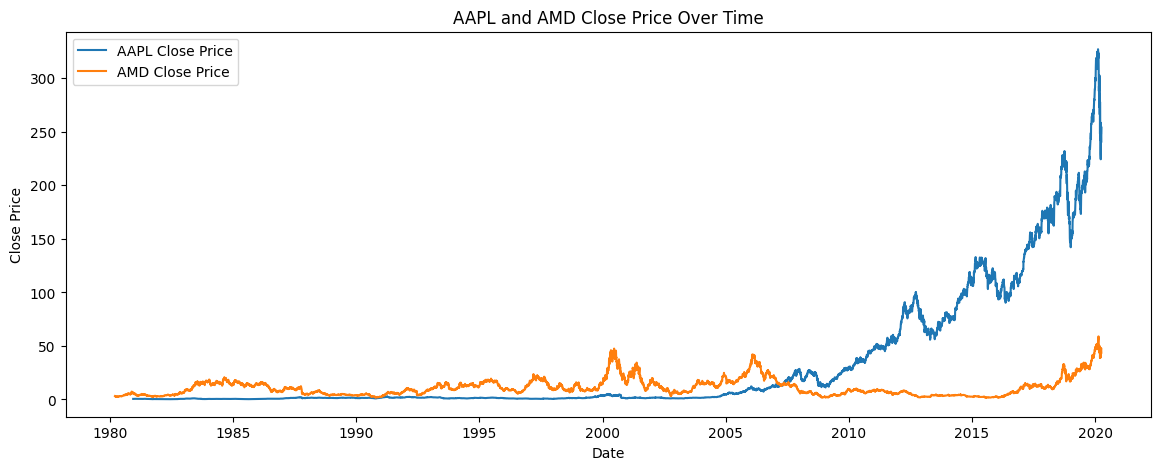

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(aapl['Close'], label='AAPL Close Price')
plt.plot(amd['Close'], label='AMD Close Price')
plt.title('AAPL and AMD Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [72]:
from sklearn.preprocessing import MinMaxScaler

data_aapl = aapl[['Close']]

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_aapl_scaled = scaler.fit_transform(data_aapl)

In [73]:
import numpy as np

def create_dataset(data, window_size=5, horizon=1):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size + horizon - 1, 0])
    return np.array(X), np.array(y)

# Membuat dataset time series
window_size = 5
horizon = 1
X_aapl, y_aapl = create_dataset(data_aapl_scaled, window_size, horizon)

In [74]:
def split_data(X, y, train_ratio=0.8, val_ratio=0.1):
    train_size = int(len(X) * train_ratio)
    val_size = int(len(X) * val_ratio)
    test_size = len(X) - train_size - val_size

    X_train = X[:train_size]
    y_train = y[:train_size]
    X_val = X[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]
    X_test = X[train_size + val_size:]
    y_test = y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [75]:
# Membagi dataset AAPL
X_train_aapl, y_train_aapl, X_val_aapl, y_val_aapl, X_test_aapl, y_test_aapl = split_data(X_aapl, y_aapl)

In [76]:
print(f"Shape of X_train_aapl: {X_train_aapl.shape}")
print(f"Shape of y_train_aapl: {y_train_aapl.shape}")
print(f"Shape of X_val_aapl: {X_val_aapl.shape}")
print(f"Shape of y_val_aapl: {y_val_aapl.shape}")
print(f"Shape of X_test_aapl: {X_test_aapl.shape}")
print(f"Shape of y_test_aapl: {y_test_aapl.shape}")

Shape of X_train_aapl: (7923, 5)
Shape of y_train_aapl: (7923,)
Shape of X_val_aapl: (990, 5)
Shape of y_val_aapl: (990,)
Shape of X_test_aapl: (991, 5)
Shape of y_test_aapl: (991,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data untuk di input ke LSTM [samples, time steps, features]
X_train_aapl = X_train_aapl.reshape((X_train_aapl.shape[0], X_train_aapl.shape[1], 1)) # cara reshape yang lebih akurat
X_val_aapl = X_val_aapl.reshape((X_val_aapl.shape[0], X_val_aapl.shape[1], 1))
X_test_aapl = X_test_aapl.reshape((X_test_aapl.shape[0], X_test_aapl.shape[1], 1))

model_baseline = Sequential()
model_baseline.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model_baseline.add(LSTM(50, activation='relu'))
model_baseline.add(Dense(1))
model_baseline.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model baseline diatas siap untuk dilatih dengan data X_train_aapl dan labelnya untuk mempelajari pola dalam data harga saham Apple Inc.

In [78]:
# Training Model
history_baseline = model_baseline.fit(X_train_aapl, y_train_aapl, epochs=20, batch_size=32, validation_data=(X_val_aapl, y_val_aapl), shuffle=False)

# Evaluasi model_baseline
predicted_baseline = model_baseline.predict(X_test_aapl)
predicted_baseline = scaler.inverse_transform(predicted_baseline)
actual_aapl = scaler.inverse_transform(y_test_aapl.reshape(-1, 1))

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.6520e-05 - val_loss: 0.0073
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0047 - val_loss: 0.0098
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 9.9545e-05
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.5648e-04 - val_loss: 1.5832e-04
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 1.4547e-04
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8815e-04 - val_loss: 1.9336e-04
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9149e-04 - val_loss: 7.9900e-05
Epoch 9/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9533e-04 - val_loss: 7.8901e-05
Epoch 10/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0634e-04 - val_loss: 6.8169e-05
Epoch 11/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4980e-04 - val_loss: 1.8

setelah melatih dan mengevaluasi model, "predicted_baseline" akan berisi nilai-nilai prediksi yang telah dikembalikan ke skala aslinya, dan "actual_aapl" akan berisi nilai-nilai aktual dari data pengujian yang telah dinormalisasi tersebut.

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_aapl, predicted_baseline)
mae = mean_absolute_error(actual_aapl, predicted_baseline)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 598.2682387525095
Mean Absolute Error: 14.079217828005763


Menampilkan seberapa baik model LSTM dapat memprediksi harga saham berdasarkan perbedaan antara nilai prediksi dan nilai aktual. Semakin rendah nilai MSE dan MAE, semakin baik performa prediksi model.

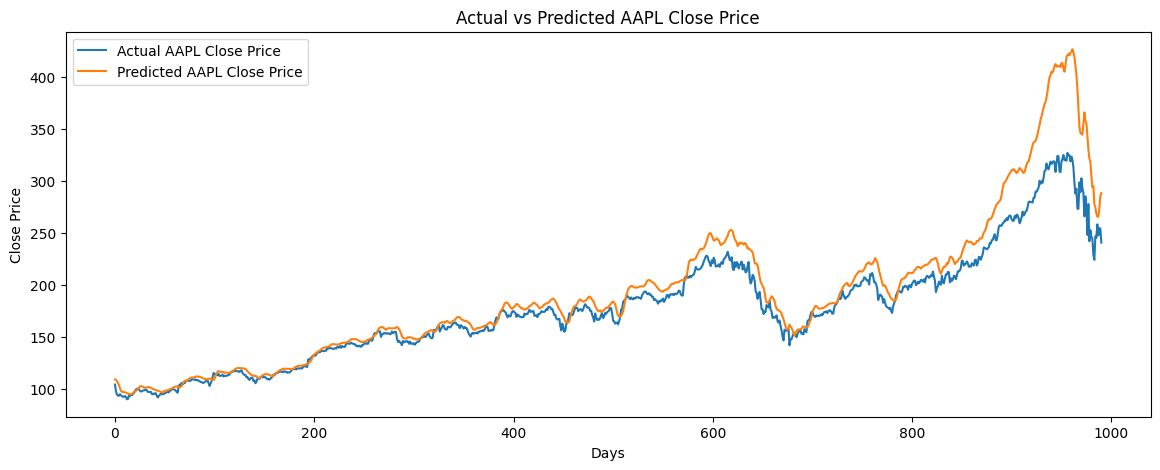

In [80]:
plt.figure(figsize=(14, 5))
plt.plot(actual_aapl, label='Actual AAPL Close Price')
plt.plot(predicted_baseline, label='Predicted AAPL Close Price')
plt.title('Actual vs Predicted AAPL Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Memodifikasi arsitektur model

In [81]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Model Modifikasi dengan penyesuaian
model_modifikasi = Sequential()
model_modifikasi.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(window_size, X_train_aapl.shape[2])))
model_modifikasi.add(Dropout(0.2))
model_modifikasi.add(LSTM(100, activation='relu', return_sequences=True))
model_modifikasi.add(Dropout(0.2))
model_modifikasi.add(LSTM(50, activation='relu'))
model_modifikasi.add(Dropout(0.2))
model_modifikasi.add(Dense(1))

# Compile model dengan learning rate yang lebih rendah
optimizer = Adam(learning_rate=0.0001)
model_modifikasi.compile(optimizer=optimizer, loss='mean_squared_error')

c:\Users\pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model diatas adalah model dimodifikasi dengan menambahkan dropout untuk mengurangi overfitting dan pengaturan learning rate dibuat lebih rendah agar membantu konvergensi yang lebih baik selama pelatihan.

In [82]:
# Training Model
history = model_modifikasi.fit(X_train_aapl, y_train_aapl, epochs=100, batch_size=128, validation_data=(X_val_aapl, y_val_aapl), shuffle=False)

# Evaluasi model
predicted_modifikasi = model_modifikasi.predict(X_test_aapl)
predicted_modifikasi = scaler.inverse_transform(np.concatenate([predicted_modifikasi, np.zeros((predicted_modifikasi.shape[0], data_aapl.shape[1] - 1))], axis=1))[:, 0]
actual_aapl_modif = scaler.inverse_transform(np.concatenate([y_test_aapl.reshape(-1, 1), np.zeros((y_test_aapl.shape[0], data_aapl.shape[1] - 1))], axis=1))[:, 0]

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.3605e-04 - val_loss: 0.0762
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.8926e-04 - val_loss: 0.0731
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6133e-04 - val_loss: 0.0707
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2000e-04 - val_loss: 0.0690
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3314e-04 - val_loss: 0.0670
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4441e-04 - val_loss: 0.0649
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2681e-04 - val_loss: 0.0617
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2912e-04 - val_loss: 0.0577
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1989e-04 - val_loss: 0.0527
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0508e-04 - val_loss: 0.0461
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9243e-04 - val_loss: 0.0383
Epoch 12

In [83]:
mse = mean_squared_error(actual_aapl_modif, predicted_modifikasi)
mae = mean_absolute_error(actual_aapl_modif, predicted_modifikasi)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 301.36866042483973
Mean Absolute Error: 10.819682106992694


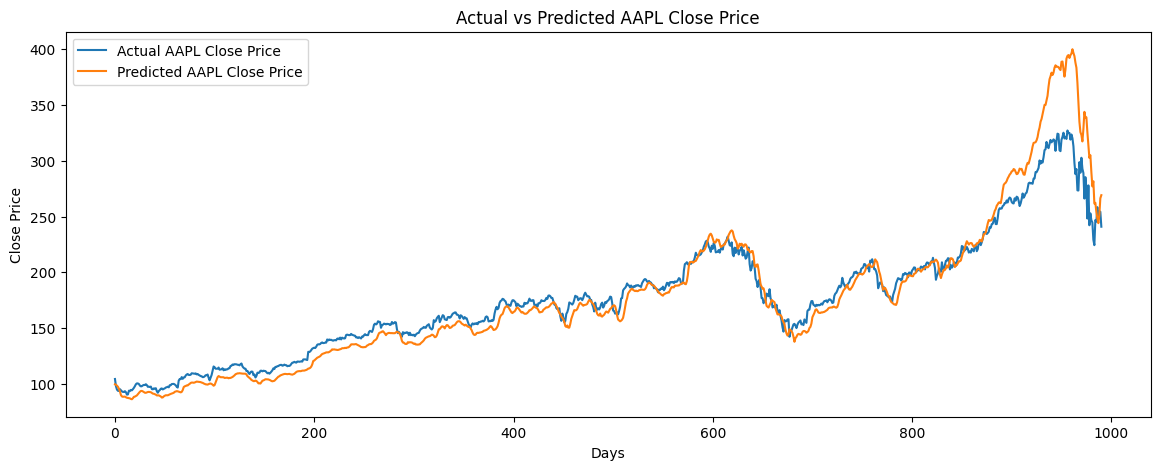

In [84]:
plt.figure(figsize=(14, 5))
plt.plot(actual_aapl, label='Actual AAPL Close Price')
plt.plot(predicted_modifikasi, label='Predicted AAPL Close Price')
plt.title('Actual vs Predicted AAPL Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Penjelasan
- Multiple LSTM Layers: Meningkatkan kemampuan model dalam menangkap pola kompleks dari data time series.
- Dropout Layers: Mencegah overfitting dengan menghilangkan sebagian unit secara acak selama pelatihan.
- ReLU Activation: Efisien dalam komputasi dan mengatasi masalah vanishing gradient.

Kombinasi ini membantu meningkatkan performa prediksi model terhadap data harga saham dengan memperbaiki kemampuan model dalam memahami dan merespons pola yang ada dalam data time series tersebut.

In [85]:
# Menghitung metrik evaluasi untuk model baseline
rmse_baseline = np.sqrt(mean_squared_error(actual_aapl, predicted_baseline))
mae_baseline = mean_absolute_error(actual_aapl, predicted_baseline)
mape_baseline = np.mean(np.abs((actual_aapl - predicted_baseline) / actual_aapl)) * 100

# Menghitung metrik evaluasi untuk model modifikasi
rmse_modifikasi = np.sqrt(mean_squared_error(actual_aapl, predicted_modifikasi))
mae_modifikasi = mean_absolute_error(actual_aapl, predicted_modifikasi)
mape_modifikasi = np.mean(np.abs((actual_aapl - predicted_modifikasi) / actual_aapl)) * 100

In [86]:
print("\nHasil Evaluasi Model Baseline:")
print(f"RMSE: {rmse_baseline:.4f}")
print(f"MAE: {mae_baseline:.4f}")
print(f"MAPE: {mape_baseline:.4f}%")

print("\nHasil Evaluasi Model Modifikasi:")
print(f"RMSE: {rmse_modifikasi:.4f}")
print(f"MAE: {mae_modifikasi:.4f}")
print(f"MAPE: {mape_modifikasi:.4f}%")


Hasil Evaluasi Model Baseline:
RMSE: 24.4595
MAE: 14.0792
MAPE: 6.4876%

Hasil Evaluasi Model Modifikasi:
RMSE: 17.3600
MAE: 10.8197
MAPE: 38.9365%


- RMSE: Memberikan ukuran kesalahan rata-rata dari prediksi model. Semakin rendah nilainya, semakin baik performa model.
- MAE: Memberikan ukuran kesalahan rata-rata absolut dari prediksi model. Nilai yang lebih rendah menunjukkan prediksi yang lebih baik.
- MAPE: Memberikan ukuran kesalahan persentase rata-rata dari prediksi model, dihitung sebagai persentase dari nilai aktual.

model modifikasi memiliki performa yang lebih baik dibandingkan dengan model baseline

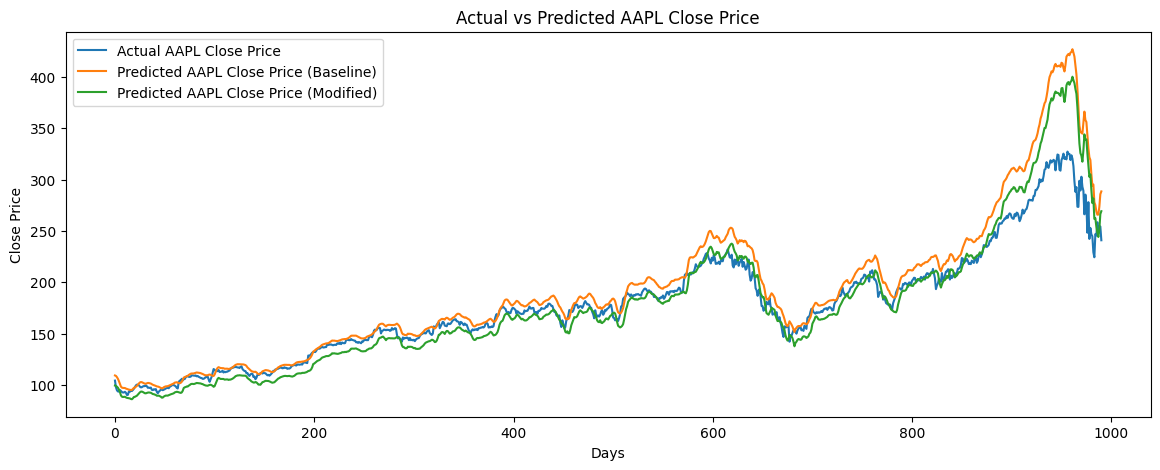

In [87]:
# Visualisasi hasil prediksi
plt.figure(figsize=(14, 5))
plt.plot(actual_aapl, label='Actual AAPL Close Price')
plt.plot(predicted_baseline, label='Predicted AAPL Close Price (Baseline)')
plt.plot(predicted_modifikasi, label='Predicted AAPL Close Price (Modified)')
plt.title('Actual vs Predicted AAPL Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [88]:
# Define the scaler and normalize AMD close prices
data_amd = amd[['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
data_amd_scaled = scaler.fit_transform(data_amd)

In [89]:
# Function to create dataset in sequences for LSTM input
def create_dataset(data, window_size=5, horizon=1):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size + horizon - 1, 0])
    return np.array(X), np.array(y)

# Membuat dataset time series
window_size = 5
horizon = 1
X_amd, y_amd = create_dataset(data_amd_scaled, window_size, horizon)

In [ ]:
# Splitting AMD data menjadi train, validation, and test sets
def split_data(X, y, train_ratio=0.8, val_ratio=0.1):
    train_size = int(len(X) * train_ratio)
    val_size = int(len(X) * val_ratio)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [91]:
# Membagi dataset AMD
X_train_amd, y_train_amd, X_val_amd, y_val_amd, X_test_amd, y_test_amd = split_data(X_amd, y_amd)

In [ ]:
# Reshape data untuk input ke LSTM
X_train_amd = X_train_amd.reshape(-1, window_size, 1) #-1 otomatis dalam menghitung jumlah sampel
X_val_amd = X_val_amd.reshape(-1, window_size, 1)
X_test_amd = X_test_amd.reshape(-1, window_size, 1)

In [ ]:
# malukan Training Model kembaali
history_baseline = model_baseline.fit(X_train_amd, y_train_amd, epochs=20, batch_size=32, validation_data=(X_val_amd, y_val_amd), shuffle=False)

# menggunakan training model terbaru untuk dta test AMD
predicted_amd_scaled = model_baseline.predict(X_test_amd)
predicted_amd = scaler.inverse_transform(predicted_amd_scaled)
actual_amd = scaler.inverse_transform(y_test_amd.reshape(-1, 1))

Epoch 1/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6984e-04 - val_loss: 9.7989e-04
Epoch 2/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7608e-04 - val_loss: 6.0444e-04
Epoch 3/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1470e-04 - val_loss: 3.4184e-04
Epoch 4/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4185e-04 - val_loss: 2.1680e-04
Epoch 5/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1014e-04 - val_loss: 2.2624e-04
Epoch 6/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2723e-04 - val_loss: 2.8596e-04
Epoch 7/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4655e-04 - val_loss: 2.9335e-04
Epoch 8/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4075e-04 - val_loss: 2.6470e-04
Epoch 9/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2548e-04 - val_loss: 2.4436e-04
Epoch 10/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1595e-04 - val_loss: 2.3661e-04
Epoch 11/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

In [97]:
mse = mean_squared_error(actual_amd, predicted_amd_scaled)
mae = mean_absolute_error(actual_amd, predicted_amd_scaled)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 493.60114042128487
Mean Absolute Error: 18.740993403020028


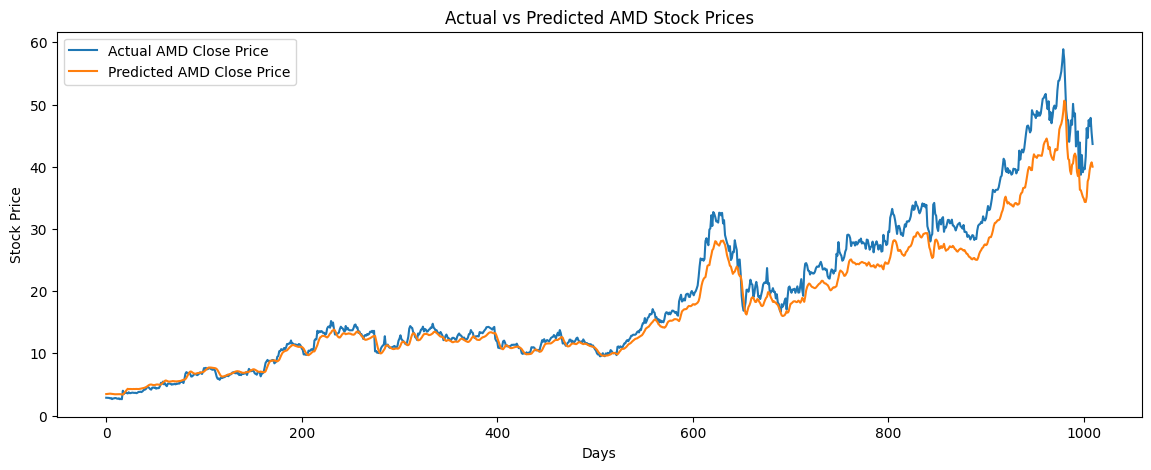

In [98]:
plt.figure(figsize=(14, 5))
plt.plot(actual_amd, label='Actual AMD Close Price')
plt.plot(predicted_amd, label='Predicted AMD Close Price')
plt.title('Actual vs Predicted AMD Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [100]:
# Training Model
history = model_modifikasi.fit(X_train_amd, y_train_amd, epochs=100, batch_size=128, validation_data=(X_val_amd, y_val_amd), shuffle=False)

# Evaluasi model
predicted_amd_scaled = model_modifikasi.predict(X_test_amd)
predicted_amd_modifikasi = scaler.inverse_transform(predicted_amd_scaled)
actual_amd_modif = scaler.inverse_transform(y_test_amd.reshape(-1, 1))

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8825e-04 - val_loss: 3.1374e-05
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.7893e-04 - val_loss: 3.9126e-05
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5819e-04 - val_loss: 4.3161e-05
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.4706e-04 - val_loss: 3.4355e-05
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.4765e-04 - val_loss: 3.0101e-05
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5205e-04 - val_loss: 3.0069e-05
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5940e-04 - val_loss: 3.2675e-05
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6246e-04 - val_loss: 3.2457e-05
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7104e-04 - val_loss: 4.6549e-05
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6568e-04 - val_loss: 3.0620e-05
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss

In [104]:
mse = mean_squared_error(actual_amd_modif, predicted_amd_modifikasi)
mae = mean_absolute_error(actual_amd_modif, predicted_amd_modifikasi)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.8607214679520148
Mean Absolute Error: 0.875448721942335


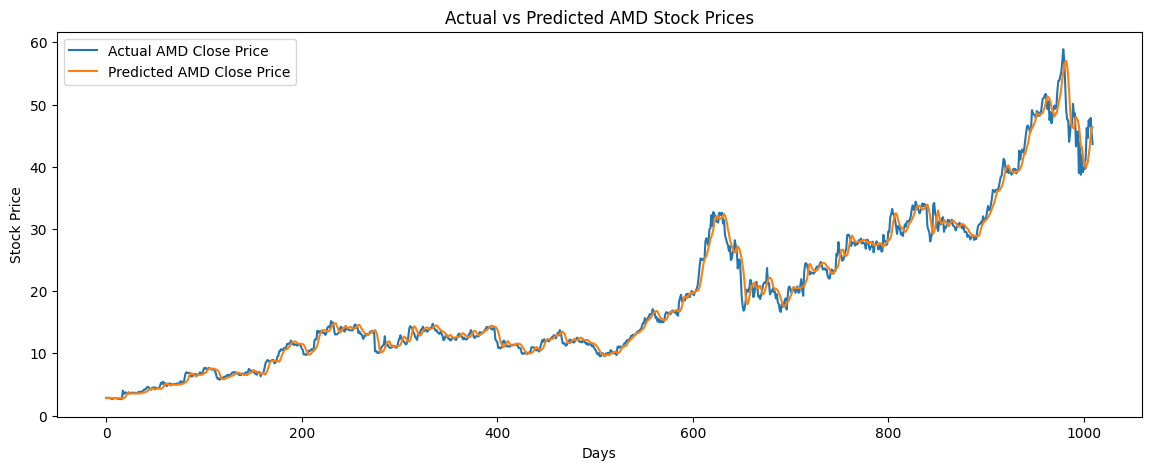

In [105]:
plt.figure(figsize=(14, 5))
plt.plot(actual_amd, label='Actual AMD Close Price')
plt.plot(predicted_amd_modifikasi, label='Predicted AMD Close Price')
plt.title('Actual vs Predicted AMD Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Penjelasan
Hasil chart diatas adalah melakukan prediksi menggunakan model modifikasi sebelumnya, akan tetapi dilakukan training kembali terlebih dahulu.

In [107]:
# Menghitung metrik evaluasi untuk model baseline
rmse_baseline = np.sqrt(mean_squared_error(actual_amd, predicted_amd))
mae_baseline = mean_absolute_error(actual_amd, predicted_amd)
mape_baseline = np.mean(np.abs((actual_amd - predicted_amd) / actual_amd)) * 100

# Menghitung metrik evaluasi untuk model modifikasi
rmse_modifikasi = np.sqrt(mean_squared_error(actual_amd, predicted_amd_modifikasi))
mae_modifikasi = mean_absolute_error(actual_amd, predicted_amd_modifikasi)
mape_modifikasi = np.mean(np.abs((actual_amd - predicted_amd_modifikasi) / actual_amd)) * 100

In [108]:
print("\nHasil Evaluasi Model Baseline:")
print(f"RMSE: {rmse_baseline:.4f}")
print(f"MAE: {mae_baseline:.4f}")
print(f"MAPE: {mape_baseline:.4f}%")

print("\nHasil Evaluasi Model Modifikasi:")
print(f"RMSE: {rmse_modifikasi:.4f}")
print(f"MAE: {mae_modifikasi:.4f}")
print(f"MAPE: {mape_modifikasi:.4f}%")


Hasil Evaluasi Model Baseline:
RMSE: 2.9318
MAE: 2.0064
MAPE: 8.8403%

Hasil Evaluasi Model Modifikasi:
RMSE: 1.3641
MAE: 0.8754
MAPE: 4.8950%


Penurunan pada nilai RMSE, MAE, dan MAPE, menandakan bahwa modifikasi pada model telah berhasil meningkatkan akurasi dan mengurangi kesalahan prediksi.

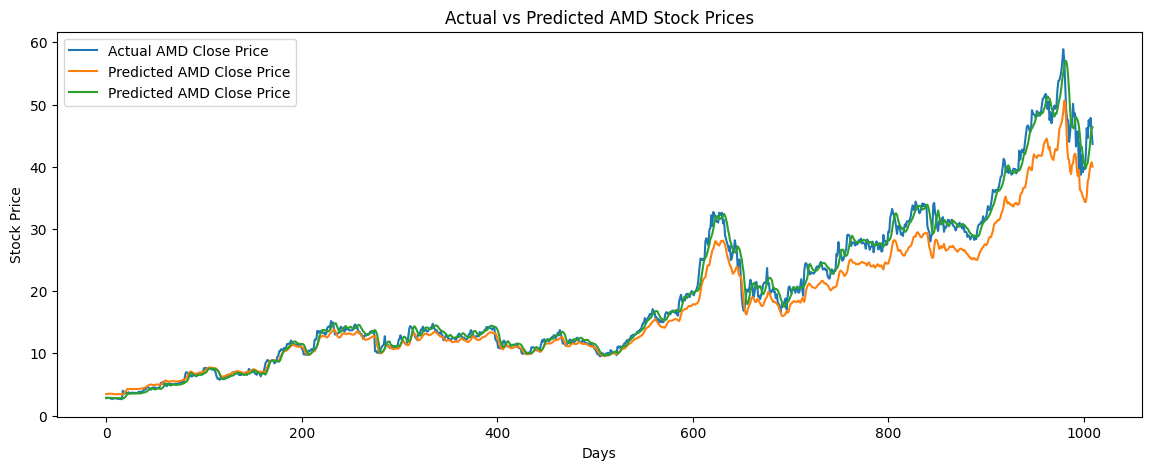

In [109]:
plt.figure(figsize=(14, 5))
plt.plot(actual_amd, label='Actual AMD Close Price')
plt.plot(predicted_amd, label='Predicted AMD Close Price')
plt.plot(predicted_amd_modifikasi, label='Predicted AMD Close Price')
plt.title('Actual vs Predicted AMD Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()